# Assignment 3 Machine Learning
* Nama : Arif Muhamad Rifai
* SCID : SC60420

## 1. Menentukan Model Machine Learning yang cocok

Model Machine Learning yang cocok digunakan untuk dataset Housing Prices adalah Supervised learning, dan pada suvervised learning ada beberapa algoritma yang cocok untuk regression pada dataset ini diantaranya
* Linear Regression
* Random Forest Regression
* Support Vector Regression
* Extreme Gradien Boosting Regression
* Neural Network


## 2. Alasan penggunaan Machine Learning Model

Pada dataset ini cocok untuk menggunakan supervised learning, karena  terdapat label dan juga output yang dimana itu merupakan salah satu ciri atau syarat dari supervised learning, berbeda dengan unsupervised learning yang menggunakan dataset yang hanya memiliki input, output dari dataset ini adalah Sale Price sebagai Dependent Variable yang nilainya bergantung pada nilai - nilai yang ada pada kolom lainnya seperti LotArea dan GrLivArea yang merupakan Independent Variable.


Untuk algoritma dari supervised learning yang menurut saya cocok digunakan pada dataset ini adalah XGBRegressor dan Random Forest Regressor

### Extreme Gradien Boosting


XGBoost Regressor memiliki keunggulan yang signifikan dalam menangani kasus regresi dengan fitur kompleks. Saat menghadapi dataset yang memiliki banyak fitur dan keberagaman fitur kategorikal, XGBoost Regressor dapat bekerja secara efisien karena kemampuannya dalam menangani dimensi tinggi dan fitur-fitur yang saling terkait. Hal ini karena algoritma ini menggunakan teknik pembelajaran bertahap (gradient boosting) yang memungkinkan model untuk secara adaptif mempelajari pola-pola yang rumit dalam data regresi. Selain itu, kemampuan XGBoost Regressor dalam melakukan ensemble dari banyak pohon keputusan memungkinkan model untuk memperoleh representasi yang lebih kuat terhadap pola-pola yang kompleks dalam data regresi. Dengan demikian, XGBoost Regressor menjadi pilihan yang sangat tepat dan efektif untuk menangani kasus regresi dengan fitur yang kompleks dan beragam.


### Random Forest Regressor

Random Forest Regressor cocok digunakan untuk prediksi harga rumah dengan dataset yang memiliki banyak fitur karena algoritma tersebut memiliki kemampuan intrinsik dalam menangani data yang kompleks dan memiliki dimensi tinggi. Dalam metode ensemble ini, setiap decision tree hanya mempertimbangkan sebagian kecil dari fitur saat membuat keputusan, mengurangi risiko overfitting dan memungkinkan model untuk menghasilkan prediksi yang akurat tanpa mengorbankan kemampuan generalisasi terhadap data yang belum pernah dilihat sebelumnya. Oleh karena itu, Random Forest Regressor menjadi pilihan yang tepat untuk analisis prediksi harga rumah pada dataset yang memiliki jumlah fitur yang besar.

**Dengan menggunakan Grid search untuk menentukan hyperparameternya**

## 3. Eksekusi koding

In [ ]:
# Mengimport library untuk Analisis Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [ ]:
# Mengimport library untuk machine learning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, make_scorer, accuracy_score, mean_absolute_percentage_error
from scipy import stats
from math import ceil

Import Dataset yang sudah dipakai pada Assignment kedua

In [ ]:
train = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTdcBlRRIStKN6f5CC6IcLhFffOJtUqgglRLxeXurjwt8c1qr7fnQMHYoe5p6feKQZwJXD4Jemd9lnx/pub?gid=840685387&single=true&output=csv"

In [ ]:
# Membuat data frame dari dataset dan membuat variable X dan y

data = pd.read_csv(train)

data = data.dropna(axis=0, subset=['SalePrice'])
data = data.drop(['Id'], axis=1)

X = data.drop(['SalePrice'], axis=1)
y = data.SalePrice

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [ ]:
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info

Dtype  Unique  Null
MSSubClass             int64      15     0
MSZoning              object       5     0
LotFrontage          float64     110     0
LotArea                int64    1072     0
Street                object       2     0
Alley                 object       2  1368
LotShape              object       4     0
LandContour           object       4     0
Utilities             object       2     0
LotConfig             object       5     0
LandSlope             object       3     0
Neighborhood          object      25     0
Condition1            object       9     0
Condition2            object       8     0
BldgType              object       5     0
HouseStyle            object       8     0
OverallQual            int64      10     0
OverallCond            int64       9     0
YearBuilt              int64     112     0
YearRemodAdd           int64      61     0
RoofStyle             object       6     0
RoofMatl              object       8     0
Exterior1st           object      15     0
Exterior2nd           object      16     0
MasVnrType            object       3   871
MasVnrArea           float64     327     8
ExterQual             object       4     0
ExterCond             object       5     0
Foundation            object       6     0
BsmtQual              object       4     0
BsmtCond              object       4    37
BsmtExposure          object       4    38
BsmtFinType1          object       6    37
BsmtFinSF1             int64     637     0
BsmtFinType2          object       6    38
BsmtFinSF2             int64     144     0
BsmtUnfSF              int64     780     0
TotalBsmtSF            int64     721     0
Heating               object       6     0
HeatingQC             object       5     0
CentralAir            object       2     0
Electrical            object       5     0
1stFlrSF               int64     752     0
2ndFlrSF               int64     417     0
LowQualFinSF           int64      24     0
GrLivArea              int64     861     0
BsmtFullBath           int64       4     0
BsmtHalfBath           int64       3     0
FullBath               int64       4     0
HalfBath               int64       3     0
BedroomAbvGr           int64       8     0
KitchenAbvGr           int64       4     0
KitchenQual           object       4     0
TotRmsAbvGrd           int64      12     0
Functional            object       7     0
Fireplaces             int64       4     0
FireplaceQu           object       5   689
GarageType            object       6    81
GarageYrBlt          float64      97    81
GarageFinish          object       3    81
GarageCars             int64       5     0
GarageArea             int64     441     0
GarageQual            object       5    81
GarageCond            object       5    81
PavedDrive            object       3     0
WoodDeckSF             int64     274     0
OpenPorchSF            int64     202     0
EnclosedPorch          int64     120     0
3SsnPorch              int64      20     0
ScreenPorch            int64      76     0
PoolArea               int64       8     0
Fence                 object       4  1178
MiscFeature           object       4  1405
MiscVal                int64      21     0
MoSold                 int64      12     0
YrSold                 int64       5     0
SaleType              object       9     0
SaleCondition         object       6     0
PriceCategory         object       5     0
TotalSF                int64     963     0
Age                    int64     122     0
RemodelAge             int64      62     0
TotalBath              int64       6     0
TotalPorchSF           int64     287     0
TotalFlrSF             int64     862     0
HouseAgeCategory      object       3     0
LotAreaCategory       object       3     0
UnbuiltLand            int64    1336     0
UnbuiltLandCategory   object       3     0

In [ ]:
X.dtypes.value_counts()

object     46
int64      40
float64     3
Name: count, dtype: int64

In [ ]:
y.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

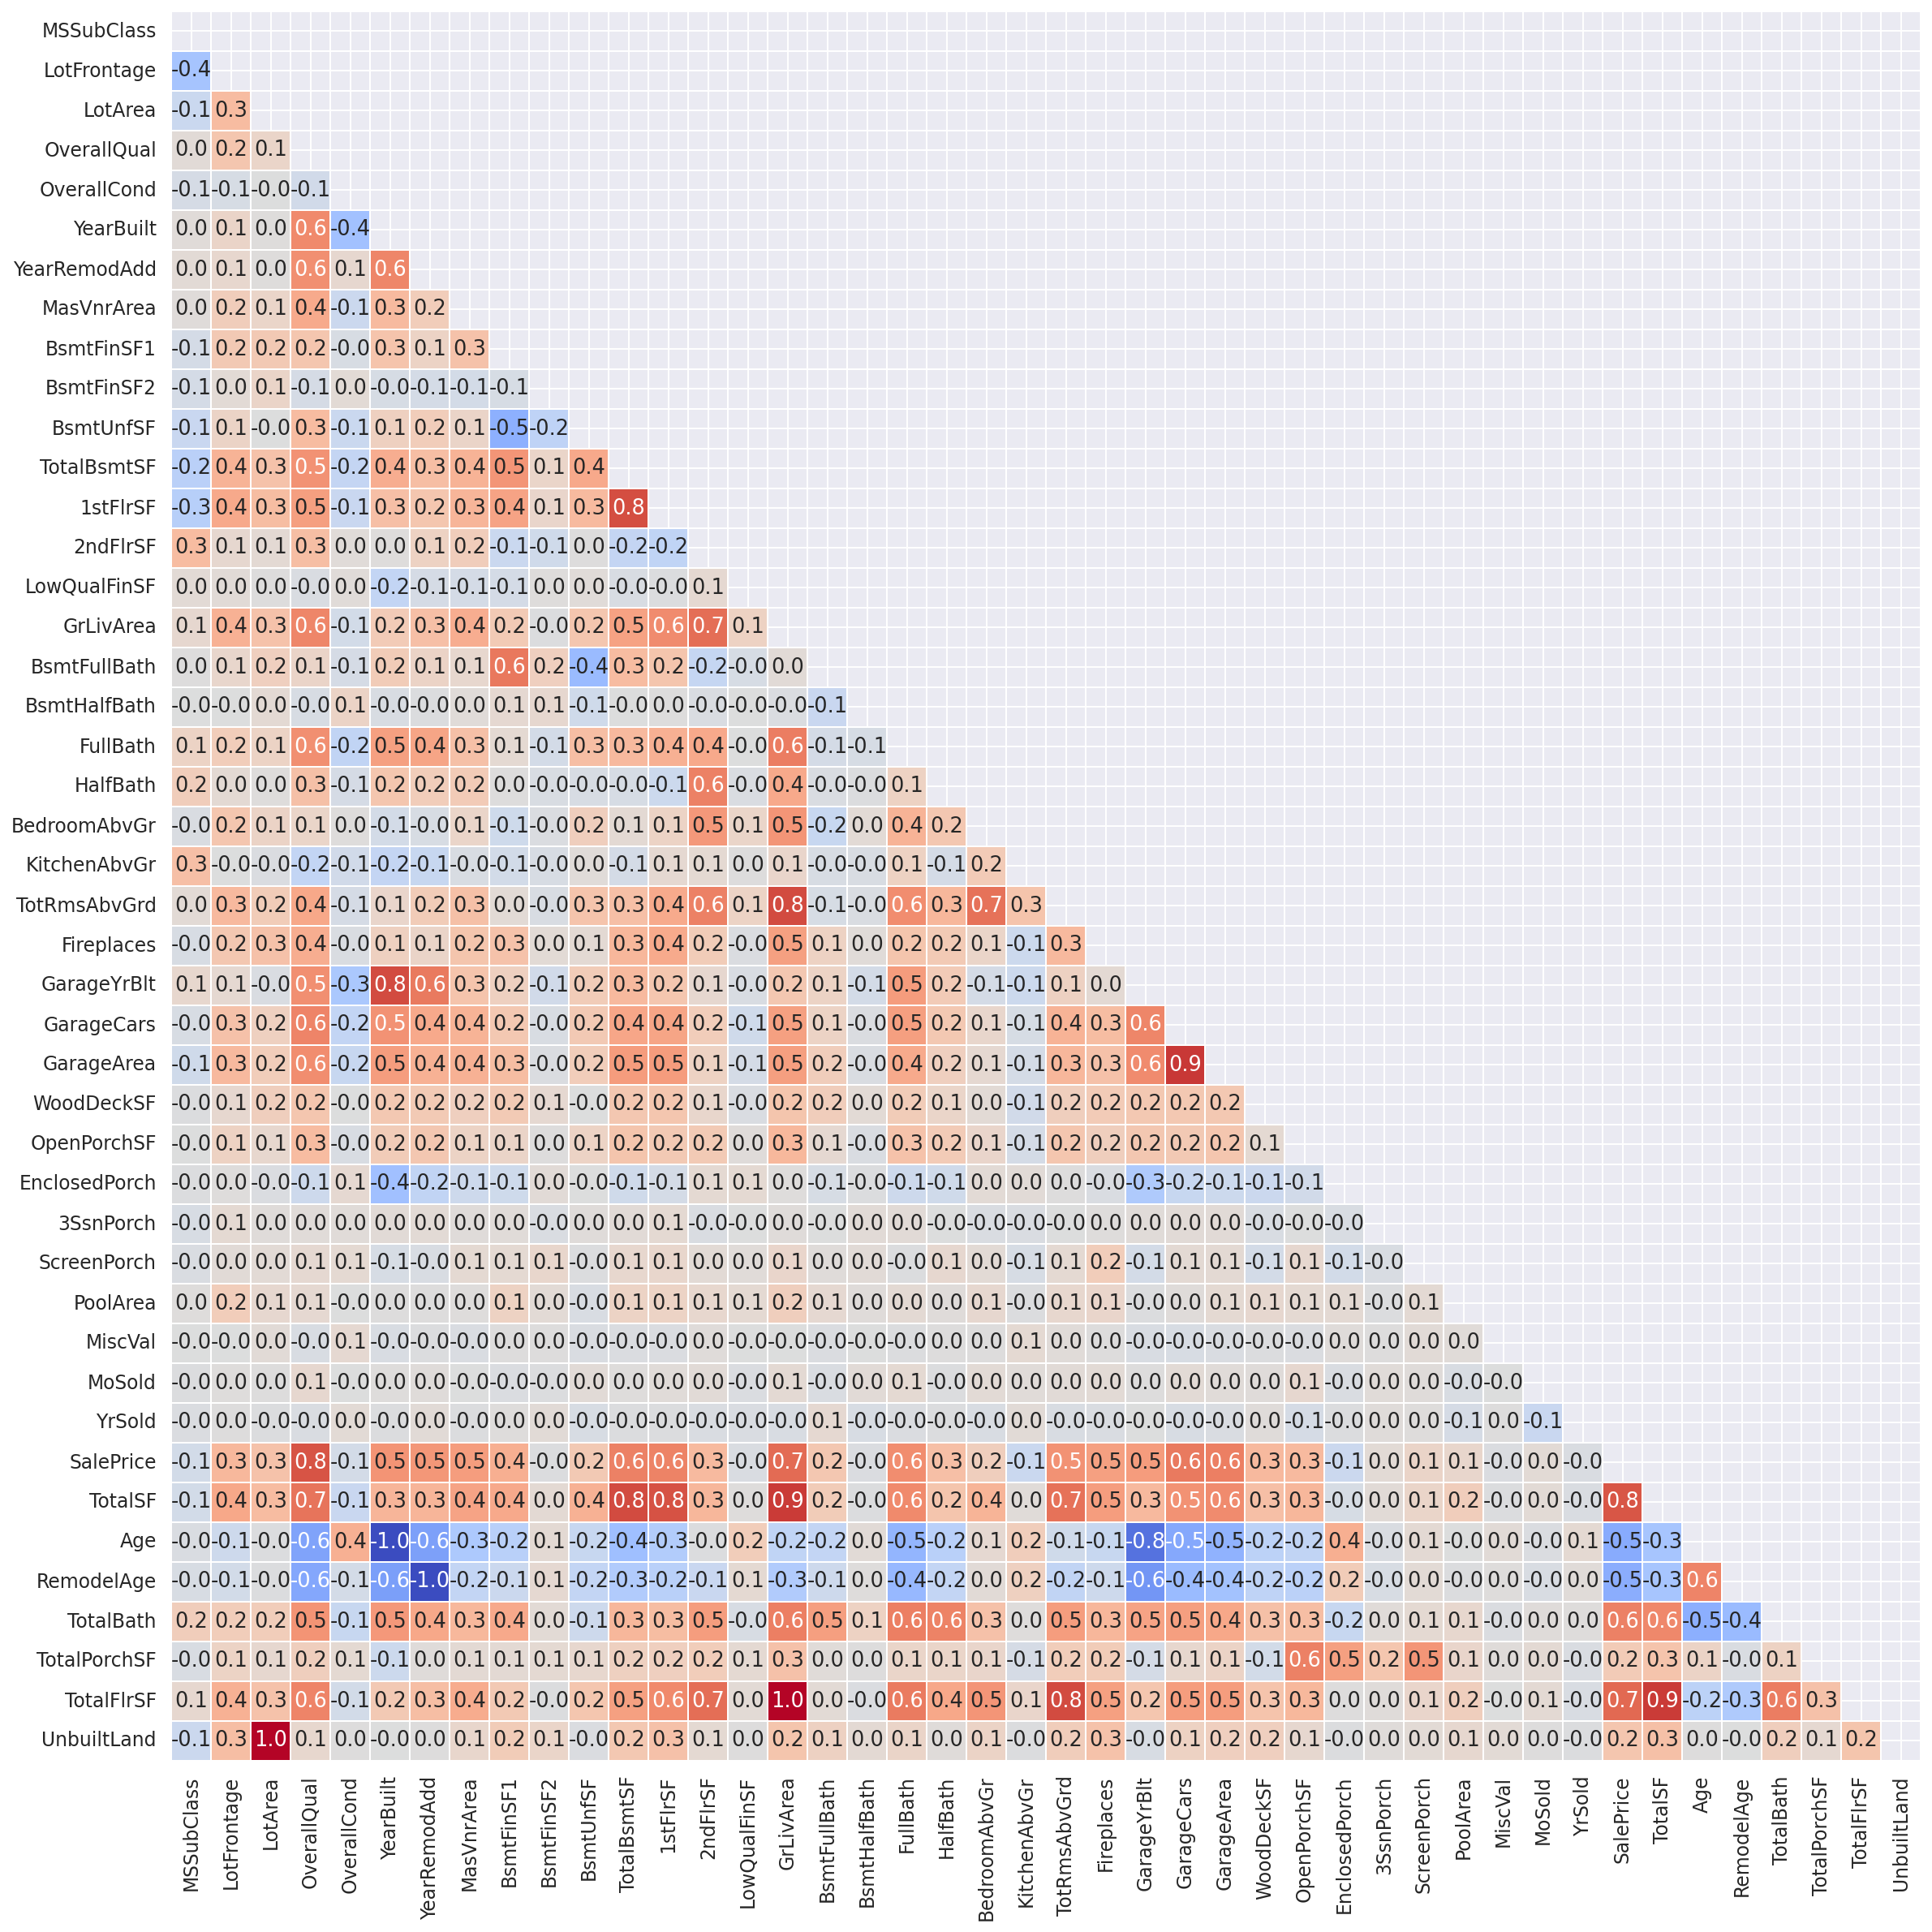

In [ ]:
# melihat korelasi antar fitur
num_data = data.select_dtypes(include=['number'])

correlation_matrix = num_data.corr()

mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=1.1)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm',
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

### **Data Cleaning**

Menghilangkan fitur yang memiliki lebih dari setengah NULL VALUE

In [ ]:
def show_null_values(X):
    # Missing values in each column of Training data
    null_value = X.isnull().sum()

    # Making DataFrame for displaying missing values in training data
    null_values = pd.DataFrame(null_value, columns=['Housing Prices'])

    # Filtering to show only columns with missing values and sorting them
    null_values = null_values[null_values['Housing Prices'] != 0]
    null_values = null_values.sort_values(by='Housing Prices', ascending=False)

    print("Total missing values in dataset:", null_values['Housing Prices'].sum(), sep='\n')

    return null_values

In [ ]:
show_null_values(X)

Total missing values in dataset:
6074


Housing Prices
MiscFeature             1405
Alley                   1368
Fence                   1178
MasVnrType               871
FireplaceQu              689
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81
BsmtExposure              38
BsmtFinType2              38
BsmtCond                  37
BsmtFinType1              37
MasVnrArea                 8

In [ ]:
null_cols = [col for col in X.columns if X[col].isnull().sum() > len(X)/2]
null_cols

['Alley', 'MasVnrType', 'Fence', 'MiscFeature']

In [ ]:
X.drop(null_cols,axis=1,inplace=True)

In [ ]:
# Jumlah missing values setelah menghilangkan kolom yang memiliki lebih dari setengah missing value

print("Total missing values:")
print("Housing Prices\t",X.isnull().sum().sum())

Total missing values:
Housing Prices	 1252


Visualisasi untuk kategorikal data

In [ ]:
object_cols = X.select_dtypes('object').columns
len(object_cols)

42

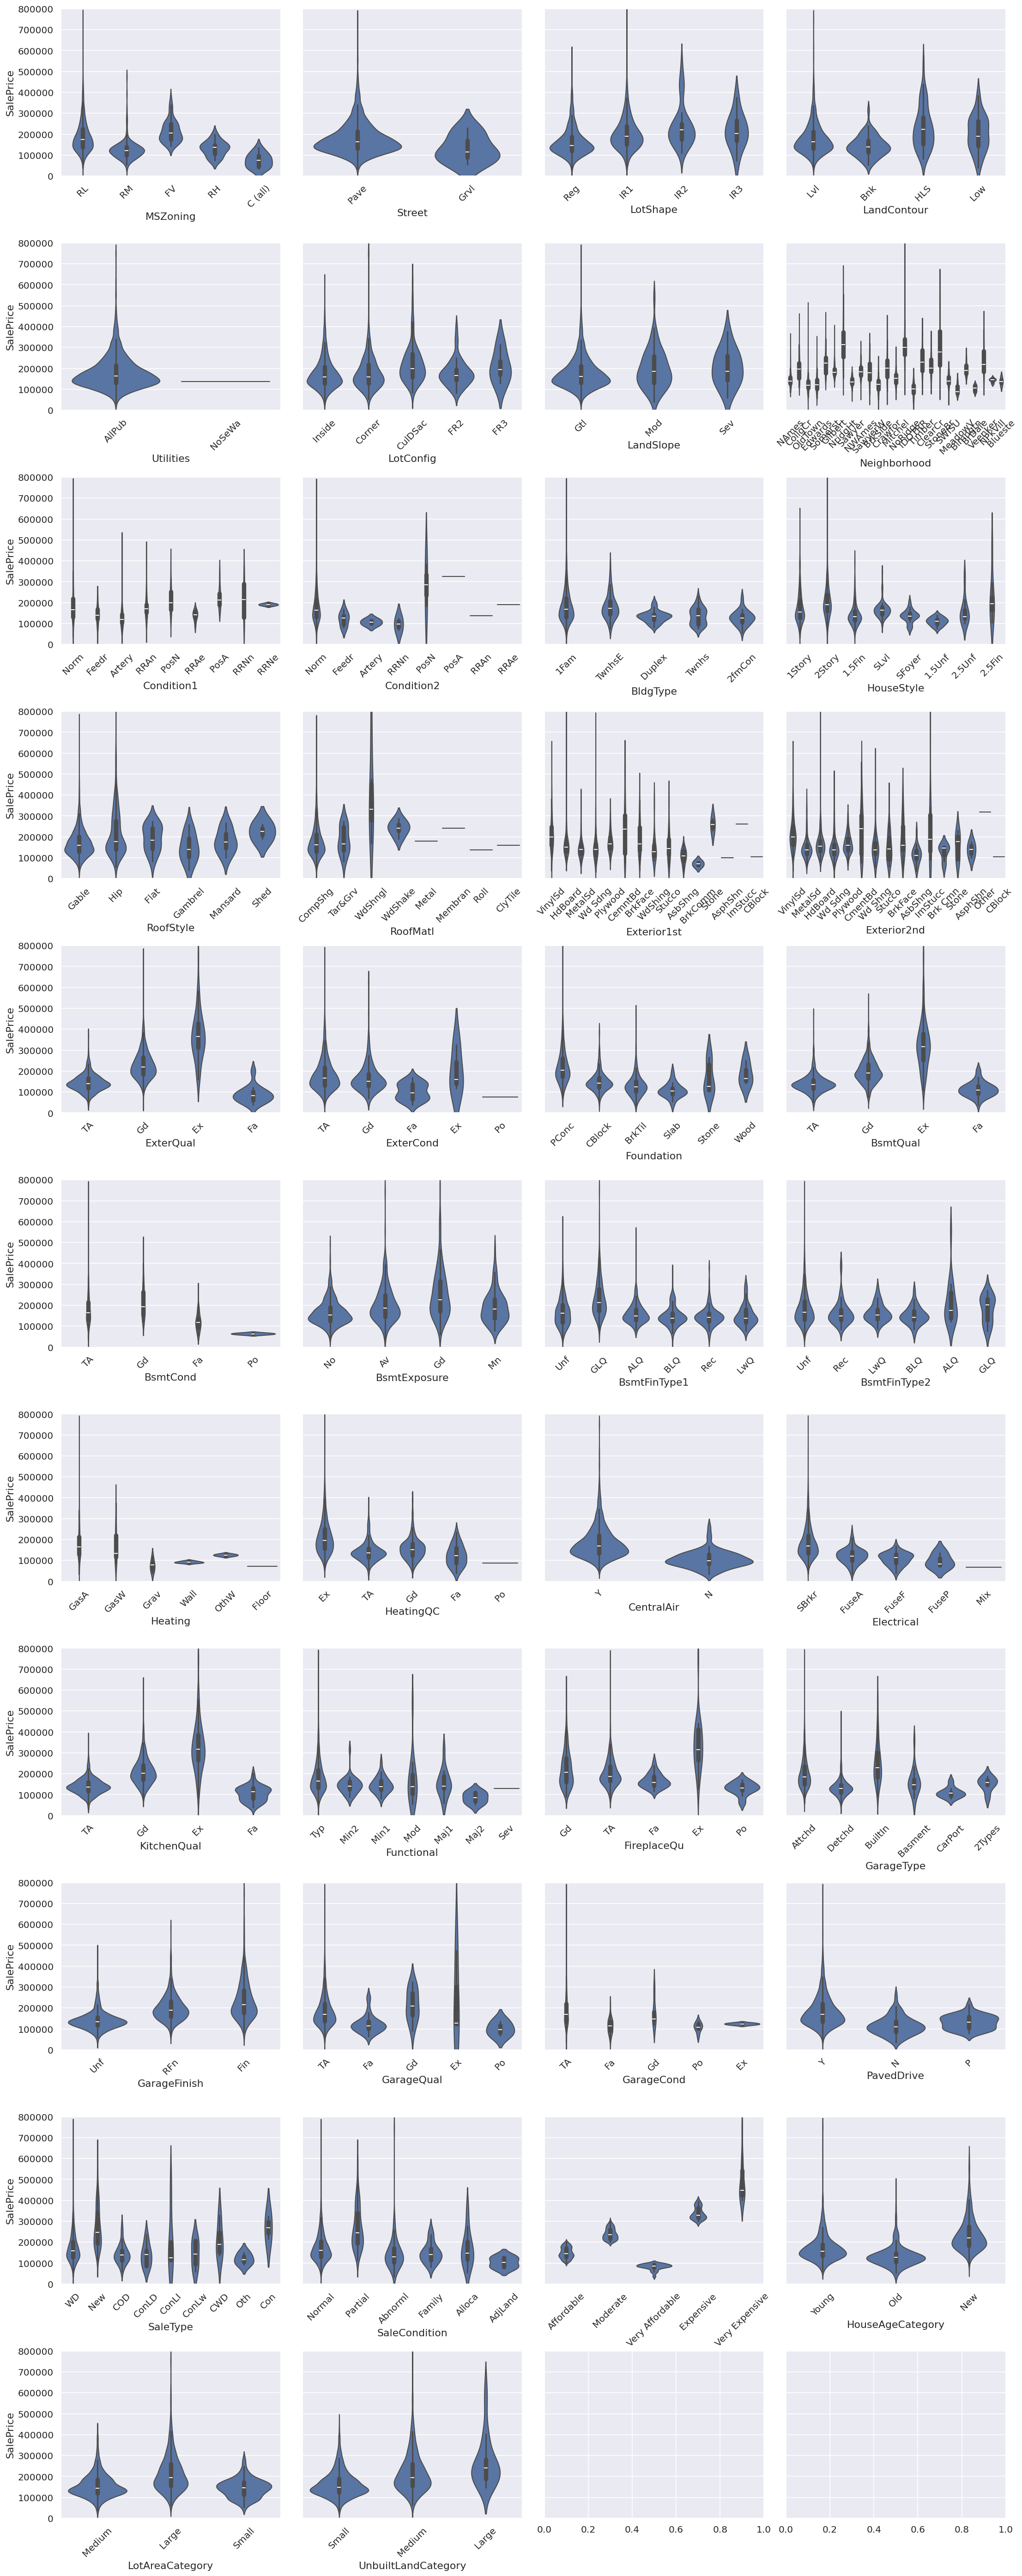

In [ ]:
fig, ax = plt.subplots(nrows=ceil(len(object_cols) / 4), ncols=4, figsize=(22, 1.4*len(object_cols)), sharey=True, dpi=120)

for col, subplot in zip(object_cols, ax.flatten()):
    freq = X[col].value_counts()
    subplot.ticklabel_format(style='plain')
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=.1,hspace=.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
    sns.violinplot(data=X, x=col, y=y, order=freq.index, ax=subplot)

In [ ]:
# Menghapus kolom yang mayoritas datanya hanya terdiri dari 1 kategori
X.Utilities.value_counts()

Utilities
AllPub    1458
NoSeWa       1
Name: count, dtype: int64

In [ ]:
X.drop('Utilities',axis=1,inplace=True)

### **Feature engineering**

In [ ]:
X.shape, y.shape

((1459, 84), (1459,))

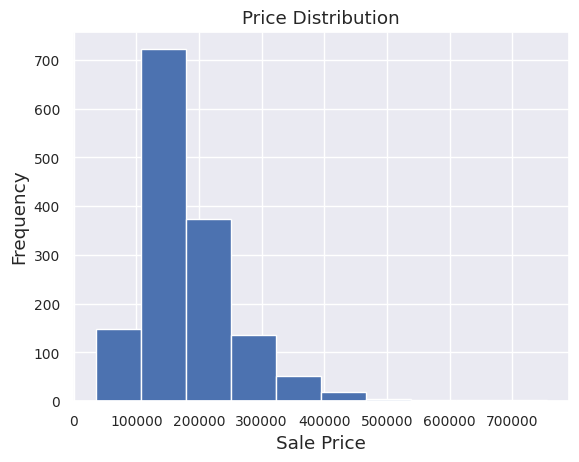

In [ ]:
y.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
mask = y < 450000
y = y[mask]
X = X[mask]

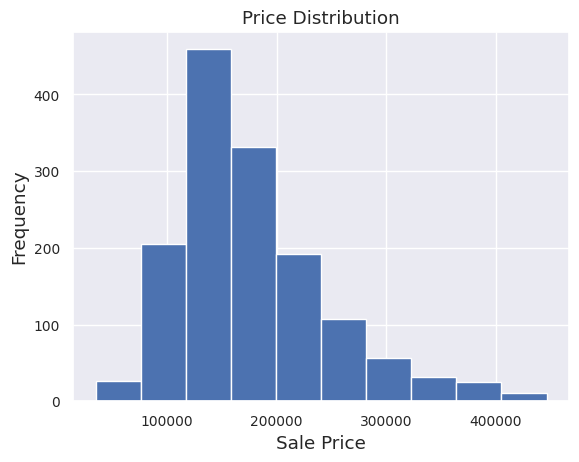

In [ ]:
y.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
print(X.shape, y.shape)

(1445, 84) (1445,)


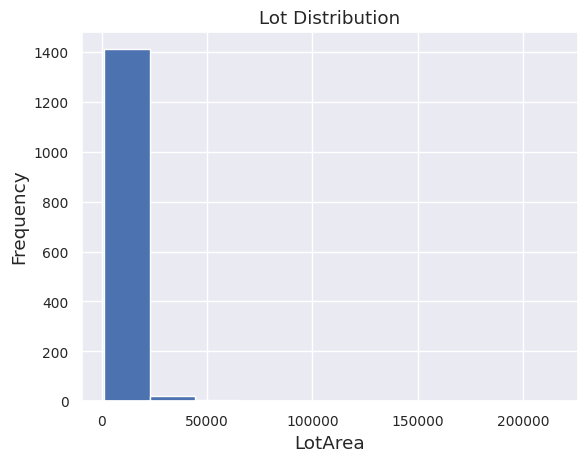

In [ ]:
X['LotArea'].hist()
plt.title('Lot Distribution')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
mask_Lot = X['LotArea'] < 26000
y = y[mask_Lot]
X = X[mask_Lot]

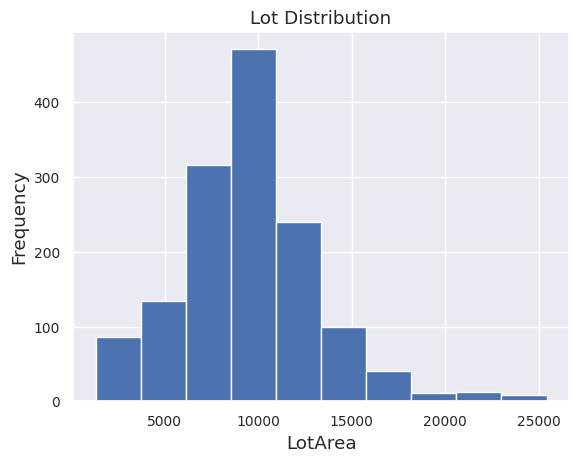

In [ ]:
X['LotArea'].hist()
plt.title('Lot Distribution')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10);

In [ ]:
print(X.shape, y.shape)

(1420, 84) (1420,)


In [ ]:
# Concat fitur baru dengan original fitur
X = pd.concat([X], axis=1)
X.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   

   OverallQual  ...  MoSold  YrSold  SaleType SaleCondition PriceCategory  \
0            7  ...       2    2008        WD        Normal      Moderate   
1            6  ...       5    2007        WD        Normal    Affordable   

  TotalSF Age  RemodelAge TotalBath TotalPorchSF TotalFlrSF HouseAgeCategory  \
0    2566   5           5         4           61       1710              New   
1    2524  31          31         3            0       1262            Young   

  LotAreaCategory UnbuiltLand UnbuiltLandCategory  
0          Medium        7594               Small  
1          Medium        8338               Small  

[2 rows x 84 columns]

In [ ]:
X.shape

(1420, 84)

### **Visualisasi Data**

In [ ]:
Xy = X.copy()
Xy['SalesPrice'] = y
Xy.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   

   OverallQual  ...  YrSold  SaleType  SaleCondition PriceCategory TotalSF  \
0            7  ...    2008        WD         Normal      Moderate    2566   
1            6  ...    2007        WD         Normal    Affordable    2524   

  Age RemodelAge  TotalBath TotalPorchSF TotalFlrSF HouseAgeCategory  \
0   5          5          4           61       1710              New   
1  31         31          3            0       1262            Young   

  LotAreaCategory UnbuiltLand UnbuiltLandCategory SalesPrice  
0          Medium        7594               Small     208500  
1          Medium        8338               Small     181500  

[2 rows x 85 columns]

Membuat sebuah fungsi untuk mengotomatisasi pembuatan 4 jenis plot untuk satu variabel numerik.

In [ ]:
def univariate_numerical_plot(df, x):
    fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)

    # 0) histogram
    sns.histplot(data=df, x=x, kde=True, ax=ax[0], bins=min(df[x].nunique(),10), kde_kws={'bw_adjust':3})
    sns.despine(bottom=True, left=True)
    ax[0].set_title('histogram')
    ax[0].set_xlabel(xlabel=x)

    # 1) box plot
    sns.boxplot(data=df, y=x, ax=ax[1])
    ax[1].set_title('boxplot')
    ax[1].set_ylabel(ylabel=x)

    # 2) probability plot
    plt.sca(ax[2])
    stats.probplot(df[x], dist = "norm", plot = plt)

    # 3) scatterplot
    sns.scatterplot(x=df[x], y=y, ax=ax[3])

    fig.tight_layout()
    fig.text(0.5, 1, f'Distribution of {x}', size=25, ha="center", va="center")
    plt.show()

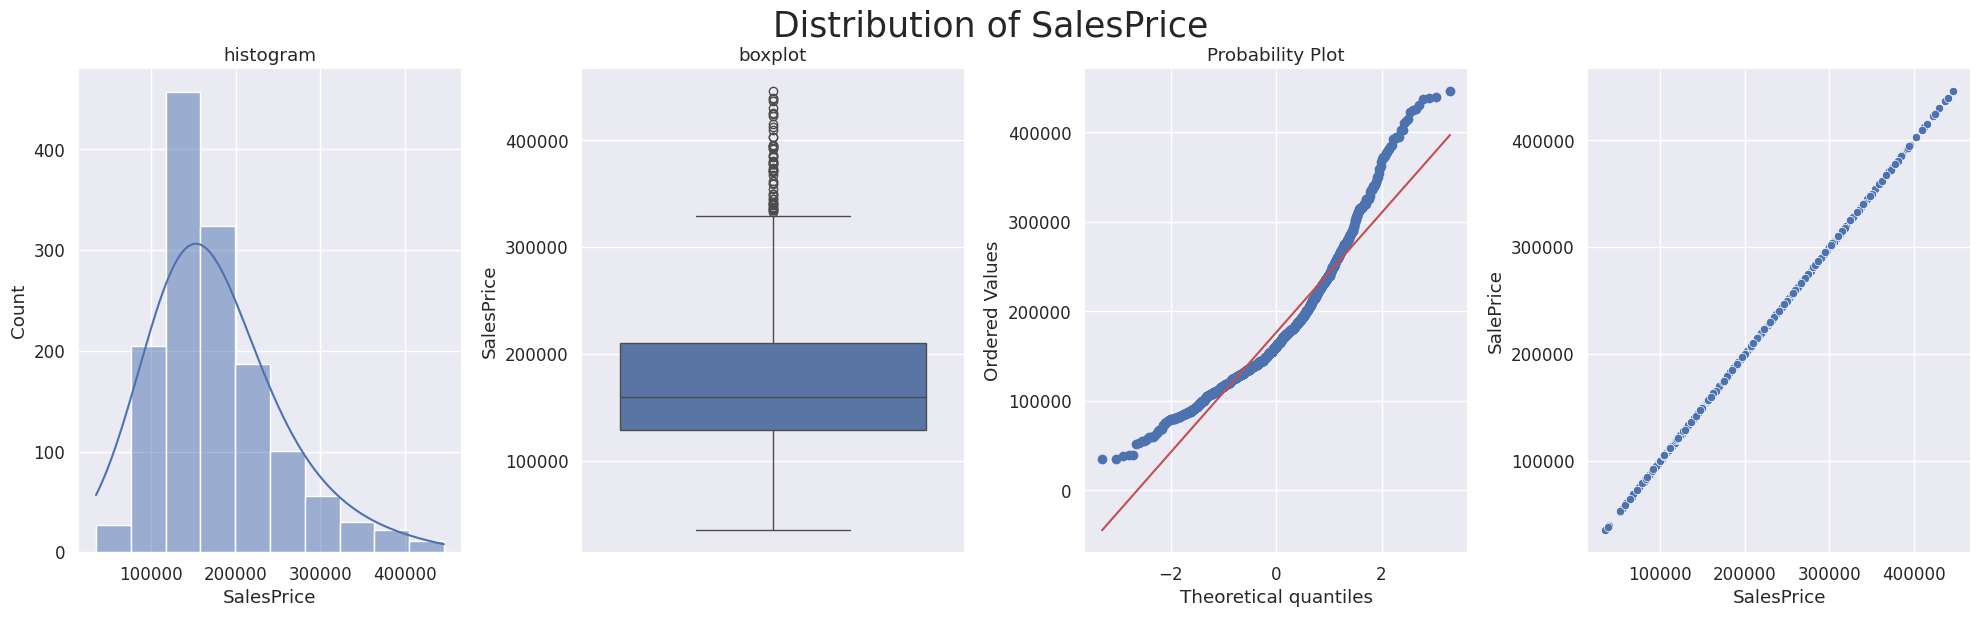

In [ ]:
univariate_numerical_plot(Xy,'SalesPrice')

Dari banyak fitur yang bisa digunakan untuk plotting, disini saya hanya fokus pada fitur-fitur yang memiliki korelasi linear yang lebih tinggi

In [ ]:
# Korelasi antara X dan Y
XyNum = Xy.select_dtypes(include=['number'])

corr_s = XyNum.corr(method='spearman')
corr_with_price = pd.DataFrame(corr_s['SalesPrice'])

corr_with_price.rename(columns = {'SalesPrice':'spearman'}, inplace = True)

corr_p = XyNum.corr(method='pearson')
corr_with_price['pearson']=corr_p['SalesPrice']

corr_with_price = corr_with_price.sort_values('pearson',ascending=False)
round(corr_with_price,2)

spearman  pearson
SalesPrice         1.00     1.00
TotalSF            0.81     0.82
OverallQual        0.81     0.81
TotalFlrSF         0.73     0.72
GrLivArea          0.72     0.71
GarageCars         0.68     0.66
GarageArea         0.64     0.64
TotalBsmtSF        0.59     0.63
TotalBath          0.69     0.61
1stFlrSF           0.56     0.61
YearBuilt          0.66     0.57
FullBath           0.64     0.57
YearRemodAdd       0.58     0.54
GarageYrBlt        0.60     0.52
TotRmsAbvGrd       0.52     0.51
Fireplaces         0.50     0.46
MasVnrArea         0.42     0.44
LotArea            0.43     0.38
BsmtFinSF1         0.28     0.37
LotFrontage        0.37     0.35
OpenPorchSF        0.47     0.32
UnbuiltLand        0.37     0.32
WoodDeckSF         0.35     0.32
2ndFlrSF           0.29     0.30
HalfBath           0.34     0.28
BsmtUnfSF          0.19     0.23
BsmtFullBath       0.21     0.23
TotalPorchSF       0.27     0.19
BedroomAbvGr       0.24     0.17
ScreenPorch        0.09     0.09
MoSold             0.08     0.08
3SsnPorch          0.07     0.06
PoolArea           0.05     0.04
MiscVal           -0.07    -0.02
BsmtFinSF2        -0.05    -0.02
YrSold            -0.03    -0.03
BsmtHalfBath      -0.02    -0.03
LowQualFinSF      -0.08    -0.06
MSSubClass         0.02    -0.08
OverallCond       -0.13    -0.08
EnclosedPorch     -0.21    -0.13
KitchenAbvGr      -0.17    -0.15
RemodelAge        -0.58    -0.55
Age               -0.66    -0.57

In [ ]:
# Top 5 fitur dengan korelasi tertinggi
top_features = corr_with_price.index[1:6]

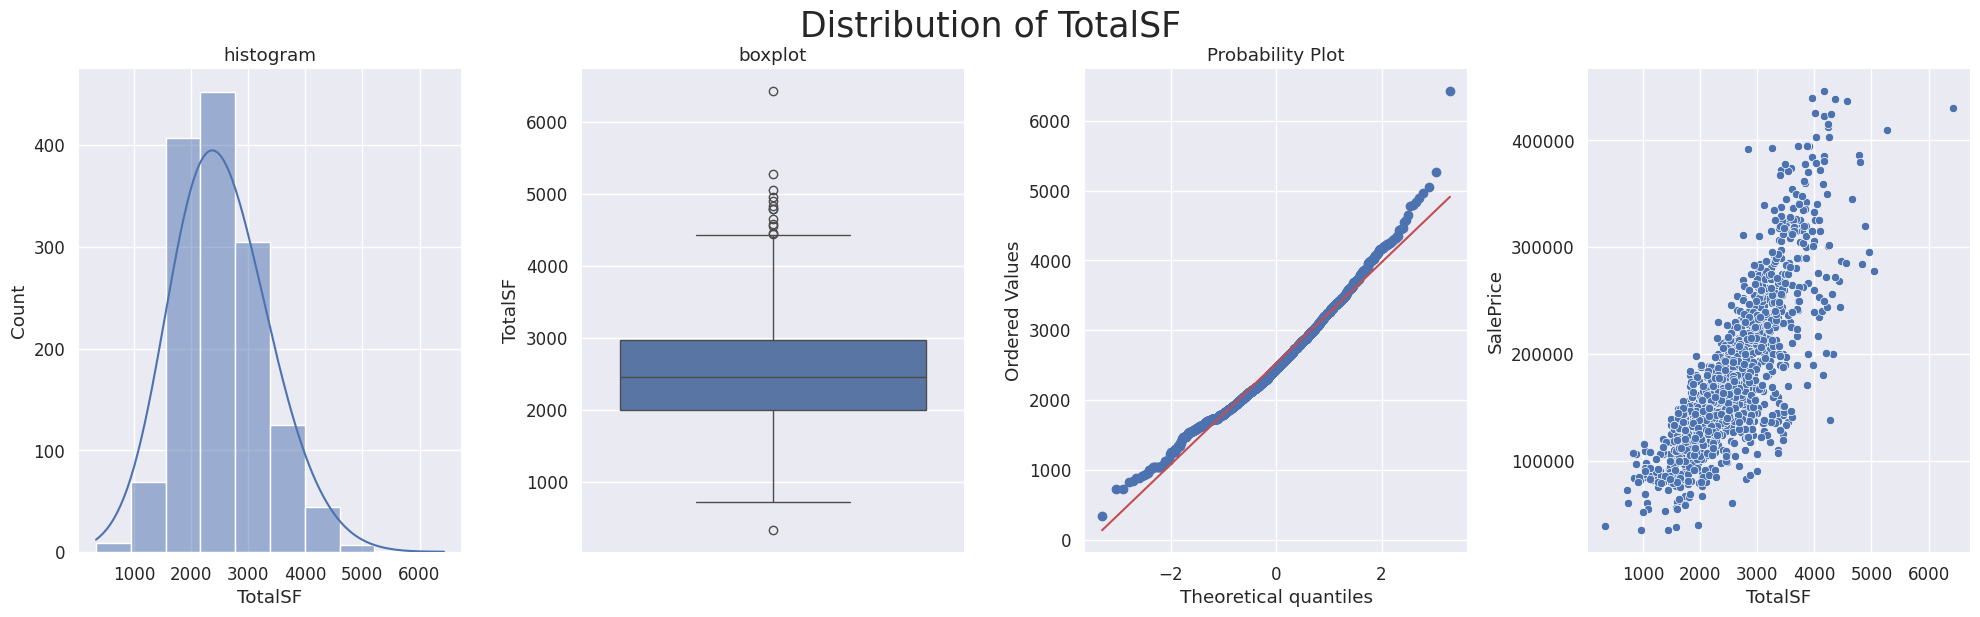

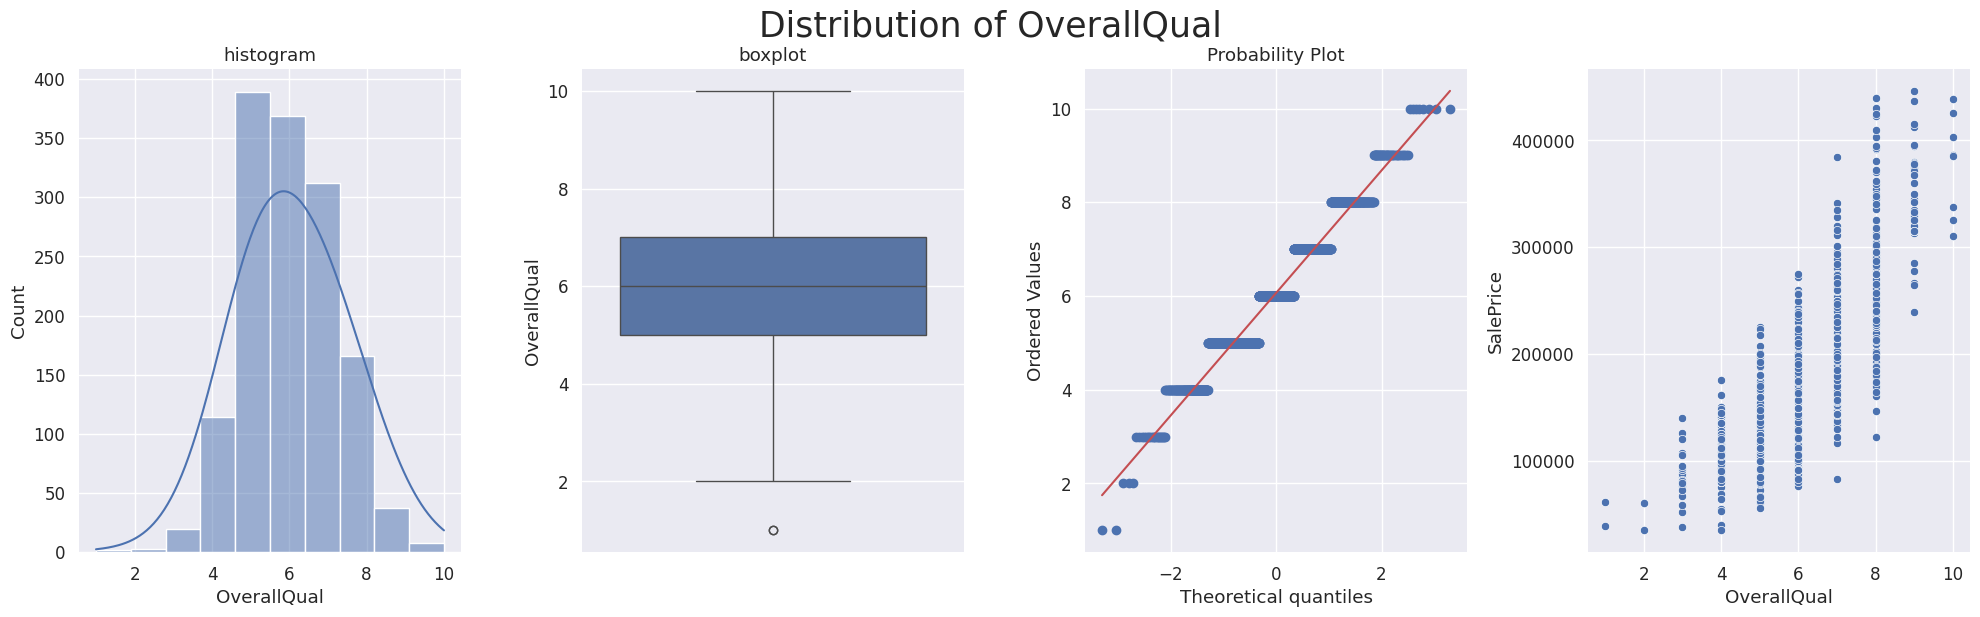

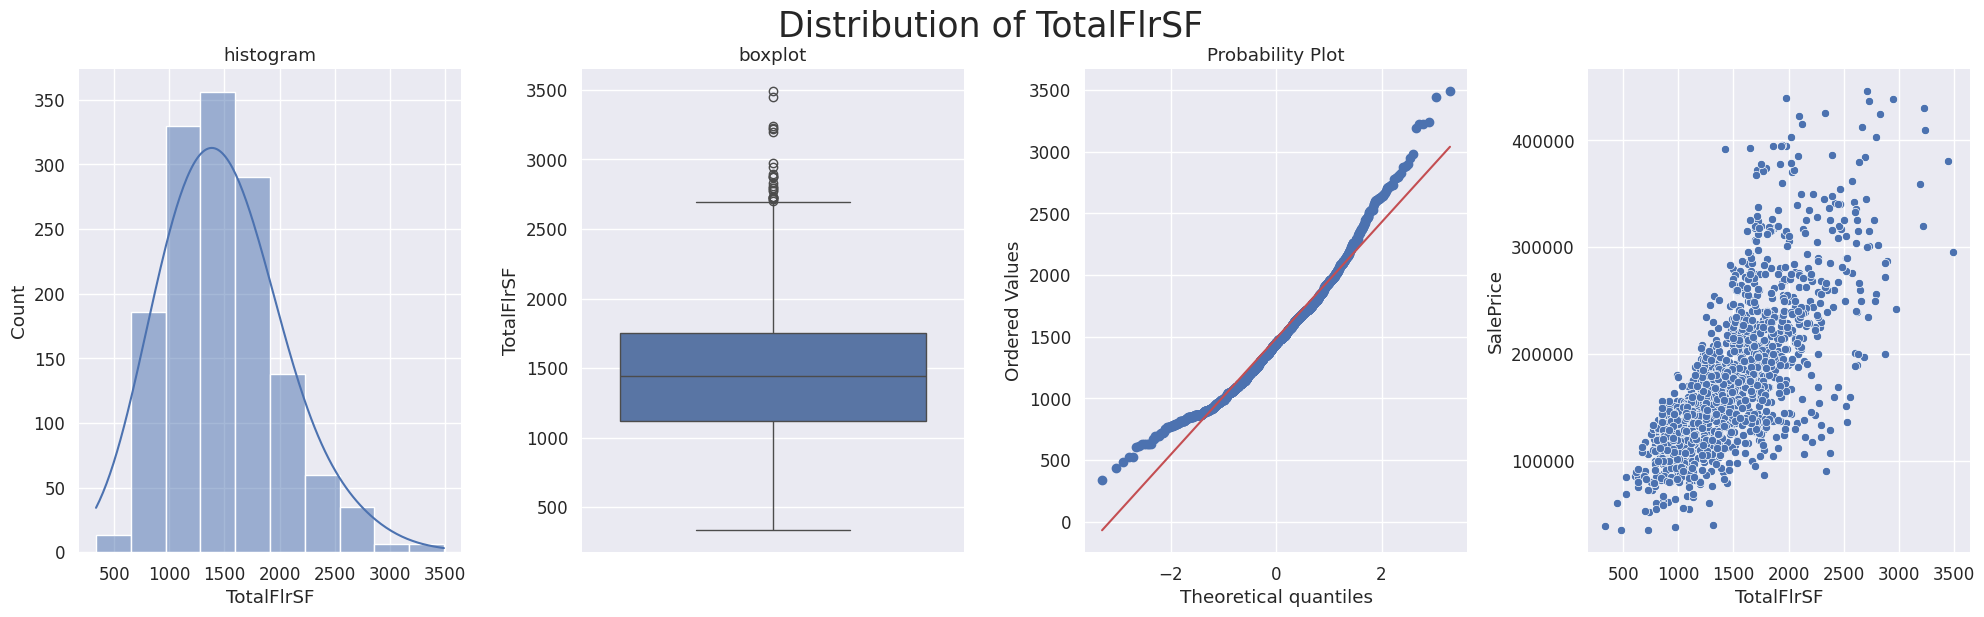

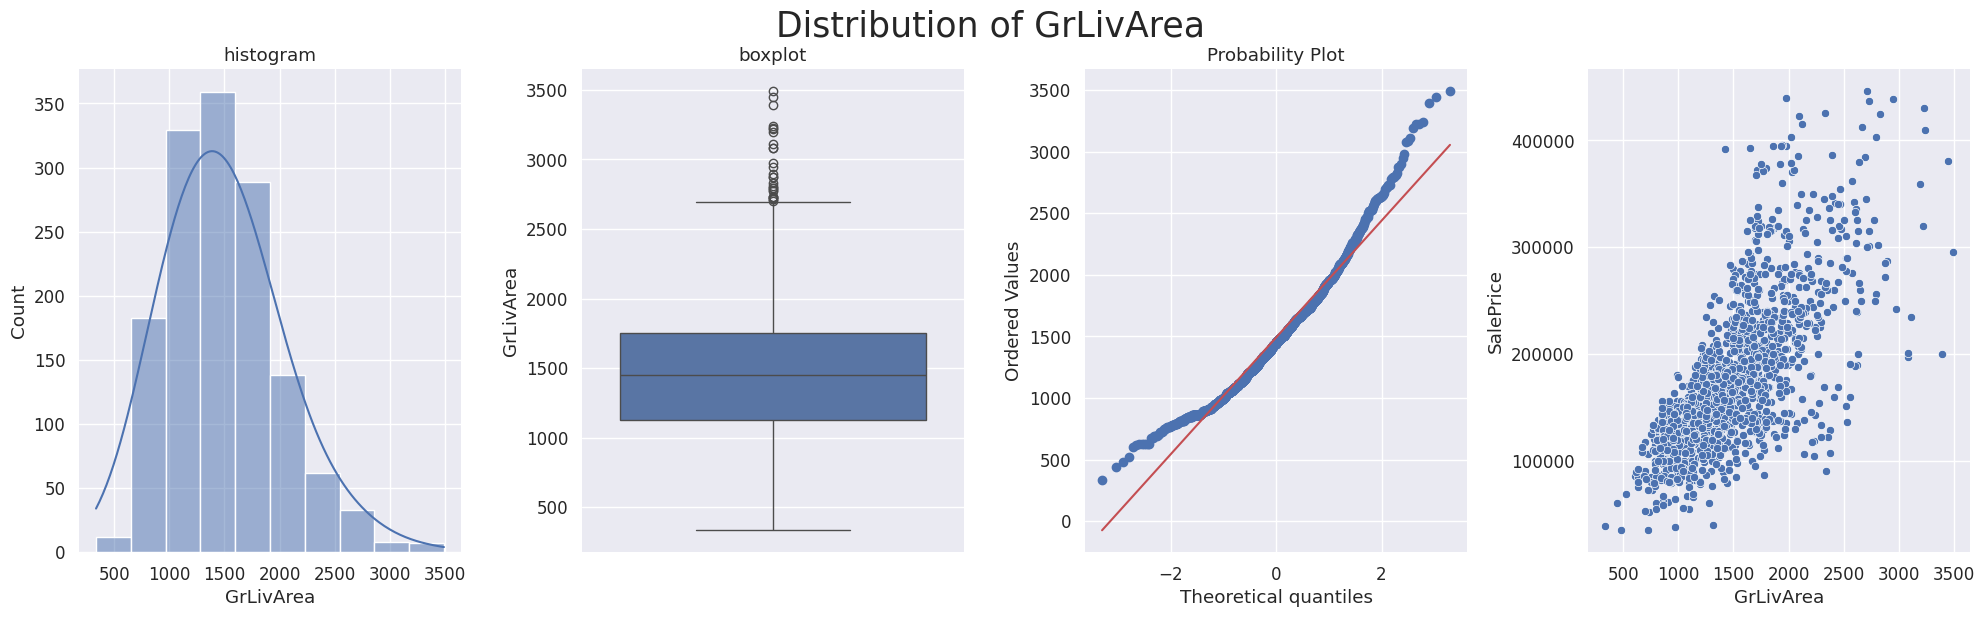

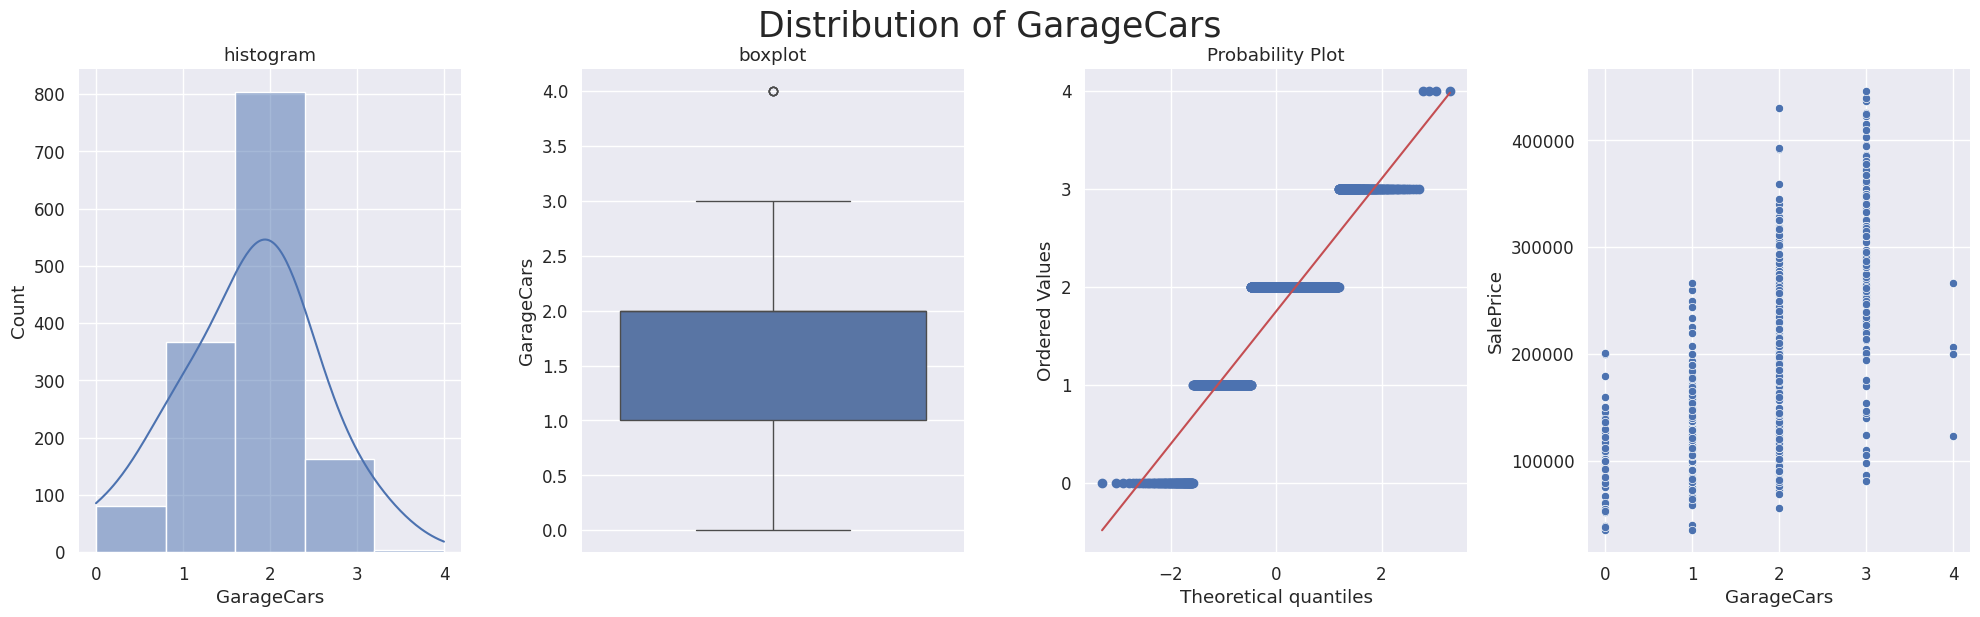

In [ ]:
# Memvisualisasikan fitur dengan korelasi tertinggi
for feature in top_features:
    univariate_numerical_plot(X,feature)

### **Pemilihan Fitur**

In [ ]:
X.dtypes.value_counts()

object     41
int64      40
float64     3
Name: count, dtype: int64

In [ ]:
# Kolom kategorikal dengan kardinalitas rendah (number of unique values in a column)
categorical_cols = [cname for cname in X.select_dtypes(["object","category","bool"]).columns
                    if X[cname].nunique() < 30]

# Kolom Numerikal dengan korelasi tinggi
numerical_cols = [cname for cname in X.select_dtypes(['int64', 'float64']).columns
                    if (abs(corr_with_price.pearson[cname]) > 0)]

# Memilih kolom yang diseleksi
selected_cols = categorical_cols + numerical_cols
X = X[selected_cols]

In [ ]:
# Fitur yang dipilih

print(len(categorical_cols),len(numerical_cols))

41 43


In [ ]:
X.dtypes.value_counts()

object     41
int64      40
float64     3
Name: count, dtype: int64

In [ ]:
# Untuk melihat kolom objek yang dipilih berdasarkan kondisi cardinality maksimum
# kolom numerik yang dipilih berdasarkan korelasi.
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info.sort_values(['Dtype', 'Unique'])

Dtype  Unique  Null
BsmtHalfBath           int64       3     0
HalfBath               int64       3     0
BsmtFullBath           int64       4     0
FullBath               int64       4     0
KitchenAbvGr           int64       4     0
Fireplaces             int64       4     0
GarageCars             int64       5     0
YrSold                 int64       5     0
PoolArea               int64       6     0
TotalBath              int64       6     0
BedroomAbvGr           int64       8     0
OverallCond            int64       9     0
OverallQual            int64      10     0
TotRmsAbvGrd           int64      12     0
MoSold                 int64      12     0
MSSubClass             int64      15     0
3SsnPorch              int64      20     0
MiscVal                int64      21     0
LowQualFinSF           int64      23     0
YearRemodAdd           int64      61     0
RemodelAge             int64      61     0
ScreenPorch            int64      71     0
YearBuilt              int64     112     0
EnclosedPorch          int64     118     0
Age                    int64     121     0
BsmtFinSF2             int64     140     0
OpenPorchSF            int64     193     0
WoodDeckSF             int64     263     0
TotalPorchSF           int64     279     0
2ndFlrSF               int64     402     0
GarageArea             int64     423     0
BsmtFinSF1             int64     615     0
TotalBsmtSF            int64     699     0
1stFlrSF               int64     727     0
BsmtUnfSF              int64     765     0
GrLivArea              int64     833     0
TotalFlrSF             int64     833     0
TotalSF                int64     929     0
LotArea                int64    1035     0
UnbuiltLand            int64    1298     0
GarageYrBlt          float64      96    81
LotFrontage          float64     106     0
MasVnrArea           float64     315     6
Street                object       2     0
CentralAir            object       2     0
UnbuiltLandCategory   object       2     0
LandSlope             object       3     0
GarageFinish          object       3    81
PavedDrive            object       3     0
HouseAgeCategory      object       3     0
LotAreaCategory       object       3     0
LotShape              object       4     0
LandContour           object       4     0
ExterQual             object       4     0
BsmtQual              object       4     0
BsmtCond              object       4    37
BsmtExposure          object       4    38
KitchenQual           object       4     0
MSZoning              object       5     0
LotConfig             object       5     0
BldgType              object       5     0
ExterCond             object       5     0
HeatingQC             object       5     0
Electrical            object       5     0
FireplaceQu           object       5   685
GarageQual            object       5    81
GarageCond            object       5    81
PriceCategory         object       5     0
RoofStyle             object       6     0
RoofMatl              object       6     0
Foundation            object       6     0
BsmtFinType1          object       6    37
BsmtFinType2          object       6    38
Heating               object       6     0
GarageType            object       6    81
SaleCondition         object       6     0
Functional            object       7     0
Condition2            object       8     0
HouseStyle            object       8     0
Condition1            object       9     0
SaleType              object       9     0
Exterior1st           object      15     0
Exterior2nd           object      16     0
Neighborhood          object      25     0

In [ ]:
show_null_values(X)

Total missing values in dataset:
1246


Housing Prices
FireplaceQu              685
GarageType                81
GarageFinish              81
GarageQual                81
GarageCond                81
GarageYrBlt               81
BsmtExposure              38
BsmtFinType2              38
BsmtCond                  37
BsmtFinType1              37
MasVnrArea                 6

**Spliting Data**

Membagi data mejadi :

*   75% untuk Data Training
*   25% untuk Data Testing



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### **Pembuatan Model**

In [ ]:
# Mengatasi missing value pada kolom numerikal dengan median
numerical_transformer = SimpleImputer(strategy='median')

# Mengatasi missing value kategorikal data dengan modus
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan keduanya dengan dataset yang ada
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#### XGBRegressor

In [ ]:
# Create object of class XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_train)

mae = mean_absolute_error(predictions, y_train)
r2 = r2_score(predictions, y_train)
print('Training MAE',round(mae,2))
print('Training R2',r2)

Training MAE 497.71
Training R2 0.9998965713742287


In [ ]:
predictions = model.predict(X_test)

mae = mean_absolute_error(predictions, y_test)
r2=r2_score(predictions, y_test)
print('testing MAE',round(mae,2))
print('Test R2', r2,2)

testing MAE 13063.85
Test R2 0.932957819910455 2


#### Random Forest Regressor


In [ ]:
# Create object of class XGBRegressor
model1 = RandomForestRegressor(random_state=42)

In [ ]:
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predictions = model1.predict(X_train)

mae = mean_absolute_error(predictions, y_train)
r2 = r2_score(predictions, y_train)
print('Training MAE',round(mae,2))
print('Training R2',r2)

Training MAE 4569.55
Training R2 0.9913077543886621


In [ ]:
predictions = model1.predict(X_test)

mae = mean_absolute_error(predictions, y_test)
r2=r2_score(predictions, y_test)
print('testing MAE',round(mae,2))
print('Test R2', r2,2)

testing MAE 12231.68
Test R2 0.9409278654911454 2


## 4. Cross Validation

Ini merupakan hasil cv sebelum dituning hyperparameter

XGBRegressor

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, learning_curve

kf = KFold(n_splits=10, shuffle=True, random_state=45)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("r2 Scores:", cross_val_scores)
print("Mean r2 Score:", np.mean(cross_val_scores))

r2 Scores: [0.9344884  0.96022065 0.93499652 0.94142515 0.92743542 0.94937686
 0.94029118 0.93583284 0.88441669 0.88899982]
Mean r2 Score: 0.9297483516390246


Random Forest Regressor

In [ ]:
cross_val_scores1 = cross_val_score(model1, X_train, y_train, cv=kf, scoring='r2')

print("r2 Scores:", cross_val_scores1)
print("Mean r2 Score:", np.mean(cross_val_scores1))

r2 Scores: [0.9368072  0.96342914 0.93842226 0.95901459 0.93887783 0.9442845
 0.93236938 0.94455828 0.90844973 0.90098574]
Mean r2 Score: 0.9367198649527438


## 5. Penjelasan Cross Validation

Hasil dari cross-validation menggunakan KFold dengan 10-fold menunjukkan bahwa Random Forest Regressor memiliki R2 score cross-validation yang sedikit lebih tinggi daripada XGBRegressor, menunjukkan bahwa Random Forest Regressor cenderung memberikan prediksi yang lebih baik atau lebih cocok dengan data daripada XGBRegressor ketika digunakan dalam situasi yang serupa. Walaupun masih harus mempertimbangkan hasil metric lainnya.

## 6. Learning Curves

In [ ]:
def plot_learning_curve(model, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring='r2', random_state=45)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve r2 score')
    plt.xlabel('Training Data')
    plt.ylabel('Score')

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation Score')

    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

XGBRegressor

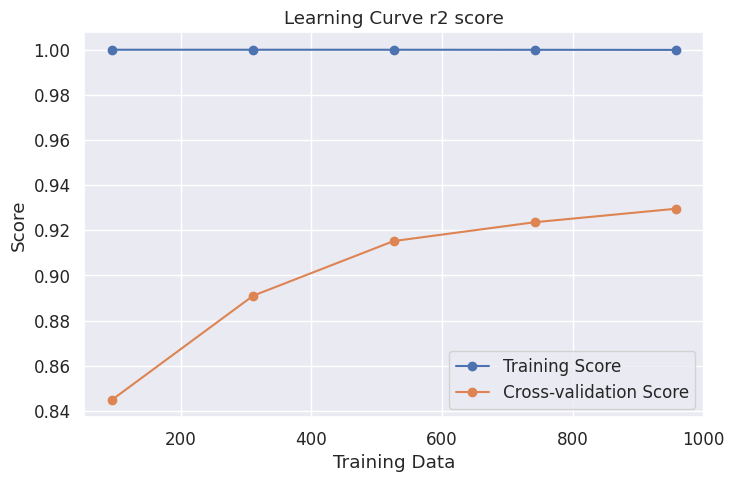

In [ ]:
plot_learning_curve(model, X_train, y_train, cv=kf)

Random Forest Regressor

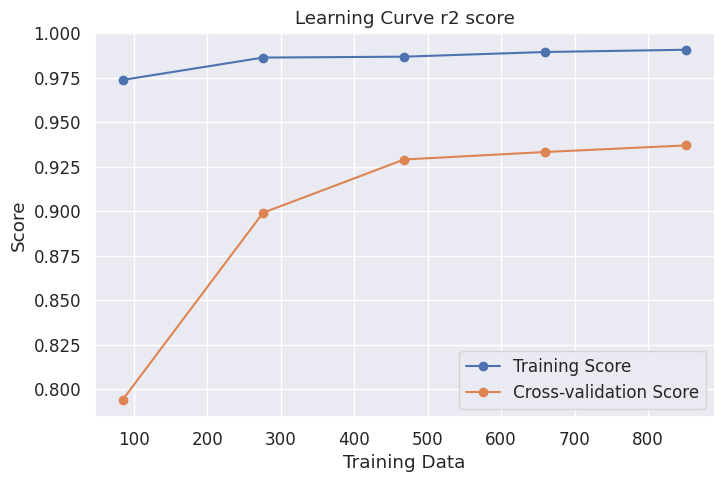

In [ ]:
plot_learning_curve(model1, X_train, y_train, cv=5)

## 7. Penjelasan Learning Curve

Dari hasil learning curve yang disebutkan, terdapat indikasi bahwa kedua model masih mengalami overfitting. Hal ini terlihat dari selisih yang signifikan antara skor training dan skor cross-validation (CV), menunjukkan bahwa model memiliki performa yang baik pada data training tetapi kurang generalisasi saat diterapkan pada data yang belum pernah dilihat sebelumnya (CV). Namun, pada learning curve Random Forest Regressor, terdapat nilai selisih yang lebih kecil antara skor training dan CV dibandingkan dengan XGBRegressor. Hal ini menunjukkan bahwa meskipun masih terjadi overfitting, Random Forest Regressor memiliki kemampuan generalisasi yang sedikit lebih baik dibandingkan dengan XGBRegressor dalam kasus ini, yang sejalan dengan hasil cross-validation sebelumnya yang menunjukkan performa yang sedikit lebih baik untuk Random Forest Regressor.

## 8. Memperbaiki akurasi Machine Learning menggunakan Tuning Hyperparameter

Menggunakan GridSearch untuk mencari hyperparameter yang terbaik dan dipadukan dengan Cross Validation

XGBRegressor

In [ ]:
param_grid = [
    {'subsample': [0.5], 'n_estimators': [1400],
     'max_depth': [5], 'learning_rate': [0.02],
     'colsample_bytree': [0.4], 'colsample_bylevel': [0.5],
     'reg_alpha':[2], 'reg_lambda': [1]}
]
grid_search = GridSearchCV(model, param_grid, cv=kf, verbose=1, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(X_train, y_train);

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [ ]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.168412      0.545196         0.013465        0.001408   

  param_colsample_bylevel param_colsample_bytree param_learning_rate  \
0                     0.5                    0.4                0.02   

  param_max_depth param_n_estimators param_reg_alpha param_reg_lambda  \
0               5               1400               2                1   

  param_subsample                                             params  \
0             0.5  {'colsample_bylevel': 0.5, 'colsample_bytree':...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0      -12766.030264      -10446.015698      -11167.428008       -9486.735981   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0      -10803.091231      -10640.656361      -11244.297244      -11699.389962   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0      -11909.602042      -10290.812353    -11045.405914      881.487154   

   rank_test_score  
0                1

In [ ]:
grid_search.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.4,
 'learning_rate': 0.02,
 'max_depth': 5,
 'n_estimators': 1400,
 'reg_alpha': 2,
 'reg_lambda': 1,
 'subsample': 0.5}

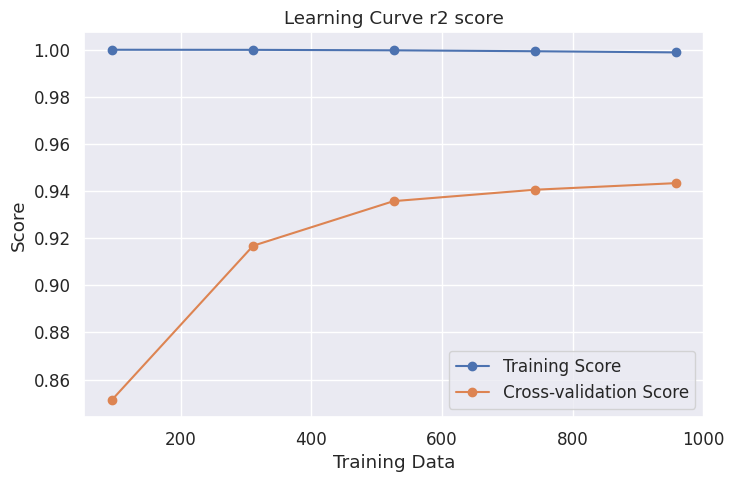

In [ ]:
best_model = grid_search.best_estimator_
plot_learning_curve(best_model, X_train, y_train, cv=kf)

Random Forest Regressor

In [ ]:
random_grid = {'n_estimators':[300],
              'max_depth':[13],
              'max_leaf_nodes':[9]}

In [ ]:
rf_random = GridSearchCV(model1, random_grid, cv=kf, verbose=1, scoring='neg_mean_absolute_error')

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=45, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [13], 'max_leaf_nodes': [9],
                         'n_estimators': [300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
rf_random.best_params_

{'max_depth': 13, 'max_leaf_nodes': 9, 'n_estimators': 300}

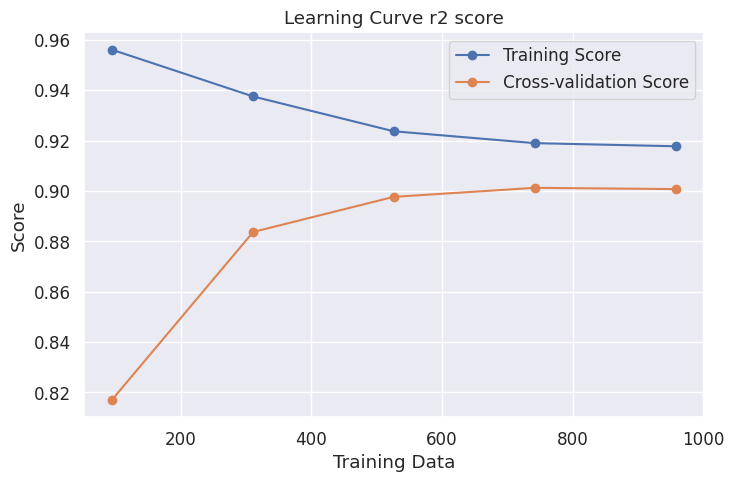

In [ ]:
best_model1 = rf_random.best_estimator_
plot_learning_curve(best_model1, X_train, y_train, cv=kf)

## 9. Metric Evaluation


Di bawah ini merupakan metric evaluation setelah dilakukannya tuning hyperparameter, dapat dilihat bahwa ada perubahan dari hasil kedua algoritma

#### XGBRegressor

Score cv sebelum dituning

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.9344884  0.96022065 0.93499652 0.94142515 0.92743542 0.94937686
 0.94029118 0.93583284 0.88441669 0.88899982]
Mean r2 Score: 0.93


Cross validation untuk model baru yang sudah dituning hyperparameter

In [ ]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.92426742 0.96708906 0.95062922 0.95693464 0.94522705 0.94358817
 0.95055973 0.94736529 0.93917734 0.90898193]
Mean r2 Score: 0.943


In [ ]:
print("Mean Absolute Error on validation data:",-grid_search.best_score_)

Mean Absolute Error on validation data: 11045.405914273277


**Metric Evaluation dari Data Train**

In [ ]:
predict_train = model.predict(X_train)
y_preds = best_model.predict(X_train)

In [ ]:
mae = mean_absolute_error(y_train, predict_train)
r2 = r2_score(y_train, predict_train)

print("Data Train Sebelum Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_train, y_preds)
r2 = r2_score(y_train, y_preds)

print("Data Train Setelah Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data Train Sebelum Tuning:
Mean Absolute Error (MAE): 497.7144843016432
R-squared (R^2) Score: 1.0
Data Train Setelah Tuning:
Mean Absolute Error (MAE): 2022.0071816314553
R-squared (R^2) Score: 0.999


**Metric Evaluation Data Test**

In [ ]:
predictions = model.predict(X_test)
y_pred = best_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Data test before tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Data test after tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data test before tuning
Mean Absolute Error (MAE): 13063.852475792253
R-squared (R^2) Score: 0.939
Data test after tuning
Mean Absolute Error (MAE): 11308.46621919014
R-squared (R^2) Score: 0.95


**Learning Curve Akhir**

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


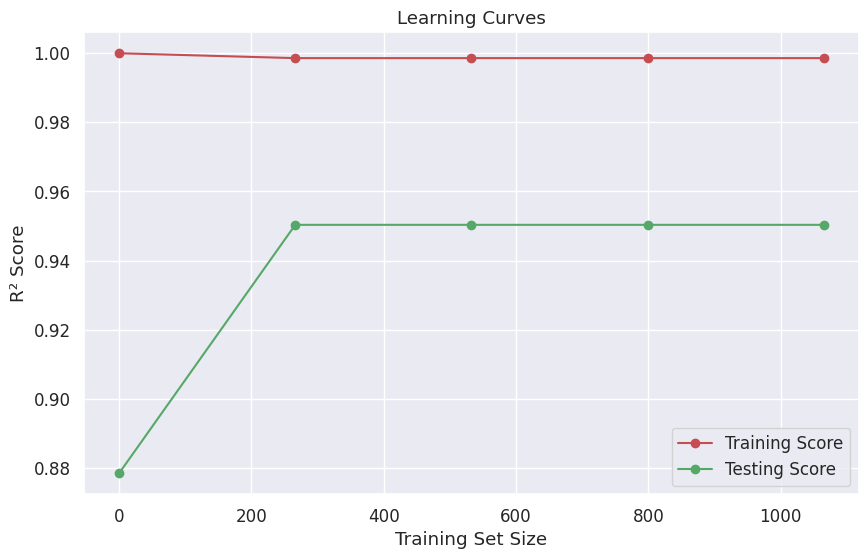

In [ ]:
train_sizes = np.linspace(0.1, 1065, 5)  # Generate 50 points from 0.1 to 1

learning_curve_train = []
learning_curve_test = []

for train_size in train_sizes:
    num_samples = int(train_size * X_train.shape[0])
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    grid_search.fit(X_subset, y_subset)

    y_pred_train = grid_search.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)  # Append the calculated R2 score

    y_pred_test = grid_search.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)  # Append the calculated R2 score

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.grid(True)
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

#### Random Forest Regressor

Score cv sebelum dituning

In [ ]:
cv_scores = cross_val_score(model1, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.9368072  0.96342914 0.93842226 0.95901459 0.93887783 0.9442845
 0.93236938 0.94455828 0.90844973 0.90098574]
Mean r2 Score: 0.937


Cross validation untuk model baru yang sudah dituning hyperparameter

In [ ]:
cv_scores = cross_val_score(best_model1, X_train, y_train, cv=kf, scoring='r2')

In [ ]:
print("r2 Scores:", cv_scores)
mean_cv_score = np.mean(cv_scores)
print("Mean r2 Score:", round(mean_cv_score, 3))

r2 Scores: [0.92755386 0.95120893 0.92806059 0.94610424 0.92470559 0.92474629
 0.91274962 0.93168247 0.8982274  0.86193716]
Mean r2 Score: 0.921


In [ ]:
print("Mean Absolute Error on validation data:",-rf_random.best_score_)

Mean Absolute Error on validation data: 14568.245089718408


**Metric Evaluation dari Data Train**

In [ ]:
predict_train = model1.predict(X_train)
y_preds = best_model1.predict(X_train)

In [ ]:
mae = mean_absolute_error(y_train, predict_train)
r2 = r2_score(y_train, predict_train)

print("Data Train Sebelum Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_train, y_preds)
r2 = r2_score(y_train, y_preds)

print("Data Train Setelah TUning:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data Train Sebelum Tuning:
Mean Absolute Error (MAE): 4569.554591549296
R-squared (R^2) Score: 0.992
Data Train Setelah TUning:
Mean Absolute Error (MAE): 15912.76627437366
R-squared (R^2) Score: 0.917


**Metric Evaluation Data Test**

In [ ]:
predictions = model1.predict(X_test)
y_pred = best_model1.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Data test before tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Data test after tuning")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", round(r2,3))

Data test before tuning
Mean Absolute Error (MAE): 12231.676788732397
R-squared (R^2) Score: 0.948
Data test after tuning
Mean Absolute Error (MAE): 16427.8234677626
R-squared (R^2) Score: 0.916


**Learning Curve Akhir**

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


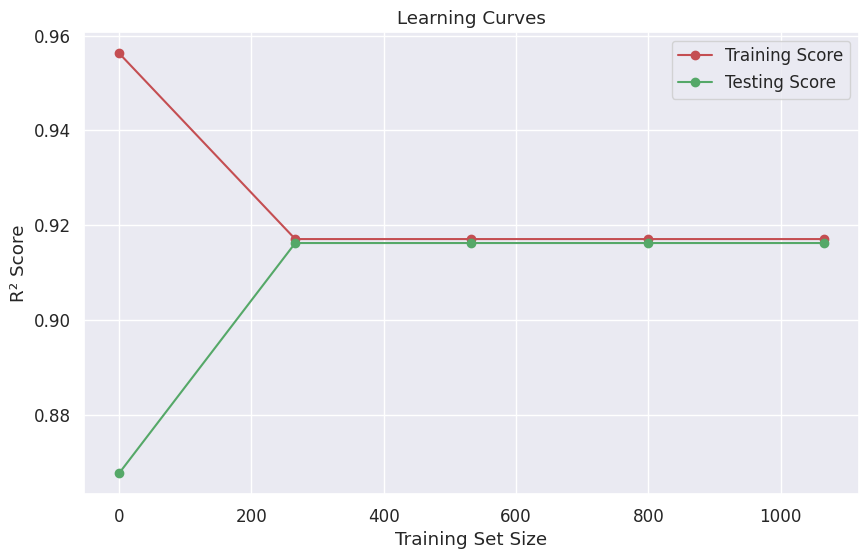

In [ ]:
train_sizes = np.linspace(0.1, 1065, 5)

learning_curve_train = []
learning_curve_test = []

for train_size in train_sizes:
    num_samples = int(train_size * X_train.shape[0])
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    rf_random.fit(X_subset, y_subset)

    y_pred_train = rf_random.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)  # Append the calculated R2 score

    y_pred_test = rf_random.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)  # Append the calculated R2 score

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.grid(True)
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

## 10. Penjelasan Metric Evaluation

R2 score dan mean absolute error (MAE) adalah dua metrik evaluasi yang sangat relevan dalam konteks prediksi harga rumah (sales price house).
* R2 score memberikan informasi tentang seberapa baik model regresi dan mampu menjelaskan variabilitas dalam harga rumah berdasarkan fitur-fitur yang digunakan dalam model tersebut.jika R2 score mendekati 1, ini menunjukkan bahwa model dapat menjelaskan sebagian besar variasi harga rumah dengan baik, yang berarti model tersebut memberikan prediksi yang lebih akurat dan berguna bagi pemilik rumah, pembeli, atau pemangku kepentingan lainnya dalam pasar properti.
* MAE memberikan ukuran kesalahan rata-rata dari prediksi harga rumah. Hal ini penting karena dalam konteks harga rumah, kesalahan prediksi yang signifikan dapat memiliki dampak finansial yang besar. Dengan mempertimbangkan MAE, dapat menilai seberapa besar kesalahan rata-rata yang dilakukan oleh model dalam memprediksi harga rumah.

### Metric for XGBRegressor


Hasil tuning hyperparameter pada XGBRegressor menunjukkan perbaikan yang signifikan dalam kinerja prediksi model. Meskipun terjadi peningkatan Mean Absolute Error (MAE) pada data training setelah tuning, nilai R-squared (R2) Score yang mendekati 1.0 menunjukkan bahwa model XGBRegressor mampu menjelaskan variasi dalam data training dengan sangat baik. Namun, adanya selisih yang cukup besar antara performa pada data training dan data test sebelum tuning dapat mengindikasikan adanya overfitting. Overfitting terjadi ketika model terlalu kompleks dan 'menghafal' data training sehingga kinerja pada data test atau data baru menjadi buruk. Namun, setelah tuning hyperparameter, perbaikan yang signifikan terlihat pada data test dengan penurunan MAE dan peningkatan R2 Score, menunjukkan bahwa model XGBRegressor lebih mampu menggeneralisasi pola-pola yang dipelajari dari data training ke data yang belum pernah dilihat sebelumnya, walaupun masih masih terindikasi overfititing.

### Metric for Random Forest Regressor

Meskipun terjadi penurunan kinerja dari segi akurasi pada model Random Forest Regressor setelah tuning hyperparameter, terdapat hal yang lebih penting untuk diperhatikan, yaitu adanya penurunan overfitting atau selisih kesalahan prediksi antara data training dan data testing setelah proses tuning. Ini menjadi indikasi bahwa meskipun model tidak lagi menghasilkan prediksi dengan akurasi yang sama pada data training, namun kemampuannya untuk menggeneralisasi pola-pola yang dipelajari dari data training ke data baru telah meningkat. Dengan demikian, model yang telah dituning dapat dianggap lebih andal dan lebih dapat dipercaya karena lebih baik dalam menyesuaikan diri dengan data yang belum pernah dilihat sebelumnya, meskipun mungkin sedikit kurang akurat dalam memprediksi data yang telah dipelajari. Hal ini menunjukkan pentingnya memperhatikan keseimbangan antara akurasi pada data training dan kemampuan generalisasi model ke data baru saat melakukan proses tuning hyperparameter, demi menghasilkan model yang lebih handal dan dapat diandalkan dalam menghadapi situasi dunia nyata.

### Conclusion

Random Forest Regressor menunjukkan performa yang lebih seimbang dan andal dalam konteks keseimbangan antara akurasi dan kemampuan generalisasi. Dengan selisih R2 score yang hanya 0.001 antara training dan testing, Random Forest Regressor memberikan bukti sebagai model yang lebih efektif dalam menangani data baru dibandingkan dengan XGBRegressor yang masih menunjukkan gejala overfitting yang signifikan dengan selisih 0.049. Ini menekankan pentingnya memilih model yang tidak hanya akurat pada data yang dikenal tapi juga robust terhadap data yang belum ditemui sebelumnya, sehingga lebih cocok dalam aplikasi dunia nyata di mana ketidakpastian data sering kali merupakan tantangan utama.





